In [129]:
import pandas as pd  # Importamos Pandas para el manejo de datos
import numpy as np   # Importamos NumPy para cálculos numéricos
import seaborn as sns  # Importamos Seaborn para visualización de datos
import matplotlib.pyplot as plt  # Importamos Matplotlib para visualización adicional
from sklearn import datasets  # Importamos el módulo datasets de Scikit-learn
from sklearn.cluster import DBSCAN  # Importamos DBSCAN para clustering
from sklearn.datasets import make_circles  # Importamos make_circles para generar datos sintéticos
from sklearn.preprocessing import MinMaxScaler  # Importamos MinMaxScaler para escalar datos

In [130]:
from sklearn.datasets import make_moons
# puedo importar otro make y crer otras dformas con el algoritmo
X, v = make_moons(n_samples=400, noise=0.05, random_state=0)

In [131]:
x = X[:,0] # la coordenadas x de mis puntos generados
y = X[:,1] # la coordenadas y de mis puntos generados

In [132]:
data = {"x": x, "y":y}
df = pd.DataFrame(data)

<Axes: xlabel='x', ylabel='y'>

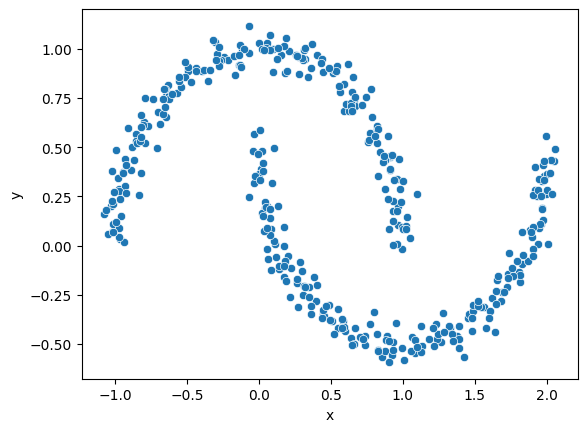

In [133]:
sns.scatterplot(data=df, x="x", y="y")

# KMeans (ejemplo donde no funciona bien)

In [134]:
from sklearn.cluster import KMeans

entrenoKM = KMeans(n_clusters=2, random_state=42)
segmentos = entrenoKM.fit_predict(X) # X es el df

e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: >

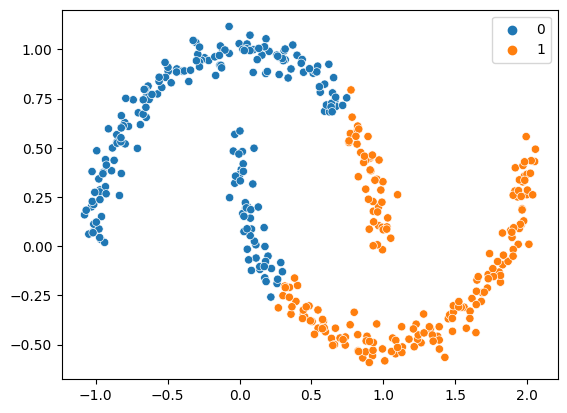

In [135]:
sns.scatterplot(x=x, y=y, hue=segmentos)

# DBSCAN

In [136]:
entrenoDB = DBSCAN(eps=0.2, min_samples=5).fit(X)
clusterDB = entrenoDB.labels_

<Axes: >

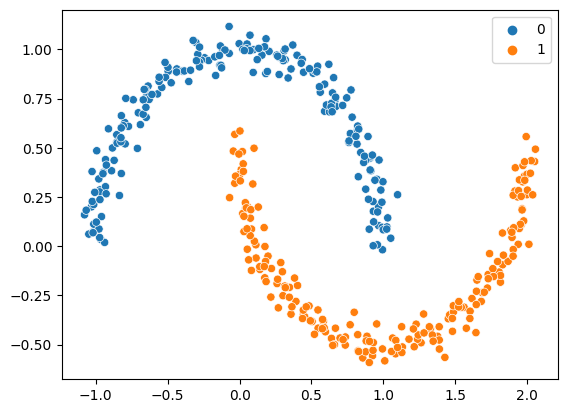

In [137]:
sns.scatterplot(x=x, y=y, hue=clusterDB)

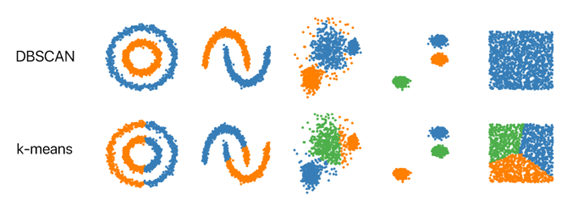

## Otro ej y analizar como parametrizar el DBSCAN

In [138]:
from sklearn.datasets import make_blobs

In [139]:
centros = [1, 0.8], [3,3], [1,-1]
stds = [0.5, 0.4, 0.1]
X, labels_true = make_blobs(n_samples=2000, centers=centros, cluster_std=stds, random_state=42)

<Axes: >

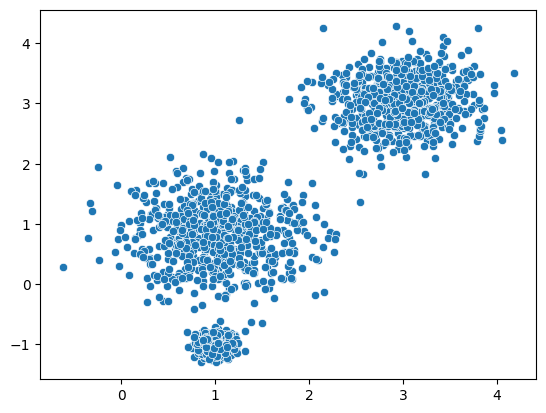

In [140]:
sns.scatterplot(x=X[:,0], y=X[:,1])

<Axes: >

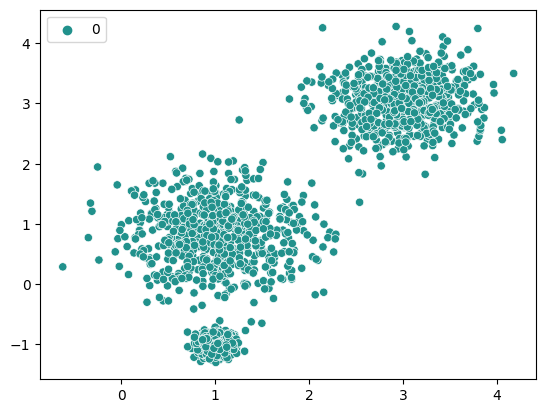

In [141]:
entrenoDB2 = DBSCAN(eps=1, min_samples=10).fit(X)
clusterDB2 = entrenoDB2.labels_
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusterDB2, palette="viridis")

<Axes: >

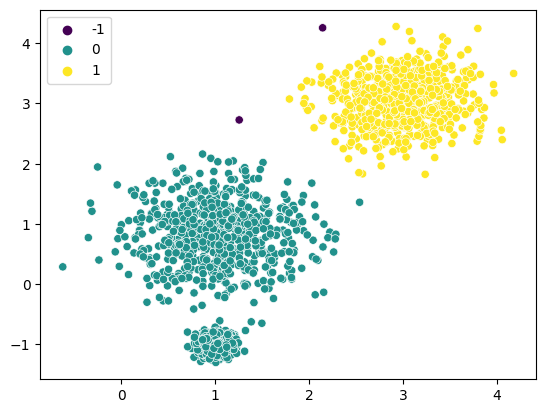

In [142]:
entrenoDB2 = DBSCAN(eps=0.5, min_samples=10).fit(X)
clusterDB2 = entrenoDB2.labels_
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusterDB2, palette="viridis")

# los outlayer, cluster de ruido, los pne en el -1

<Axes: >

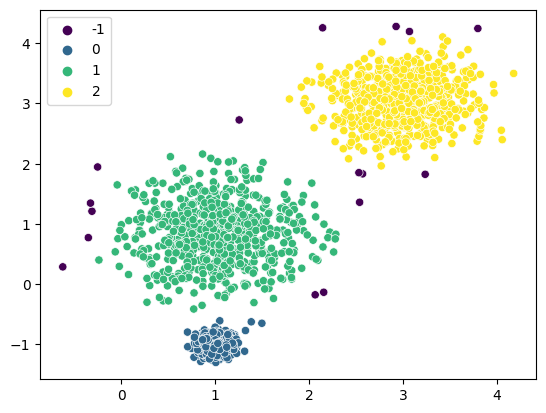

In [143]:
entrenoDB2 = DBSCAN(eps=0.31, min_samples=10).fit(X)
clusterDB2 = entrenoDB2.labels_
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusterDB2, palette="viridis")

# los outlayer, cluster de ruido, los pne en el -1

In [144]:
from sklearn.neighbors import NearestNeighbors

In [145]:
vecinos = NearestNeighbors(n_neighbors=10)
# ponemos n_nighbors=10, por qeu hemos empezado en el DBSCAN con minsample=10
nbrs = vecinos.fit(X)
distancias, indices = nbrs.kneighbors(X)

In [146]:
print(distancias)
#  muestras las distancias de cada punto el 1 es el mismo

[[0.         0.0243849  0.02451738 ... 0.08256791 0.08928321 0.09517096]
 [0.         0.1106696  0.18670531 ... 0.22359401 0.25153105 0.28054199]
 [0.         0.06176181 0.08225246 ... 0.1773943  0.21439143 0.2255282 ]
 ...
 [0.         0.03411034 0.04311405 ... 0.16717442 0.20917986 0.21541182]
 [0.         0.01683113 0.01796182 ... 0.02347727 0.02414424 0.02676336]
 [0.         0.01404891 0.02261093 ... 0.06840979 0.06946973 0.07239404]]


In [147]:
print(indices)
# muestra el punto que esta en esa dsitancia, machtea con distnacias

[[   0  780 1367 ... 1696  185   38]
 [   1 1383  783 ... 1526  114 1135]
 [   2 1950 1393 ... 1370 1985  690]
 ...
 [1997 1897 1795 ...   57  478  863]
 [1998 1274  790 ...   46  993 1408]
 [1999 1604 1448 ... 1172  850 1247]]


Text(0, 0.5, 'Distancia')

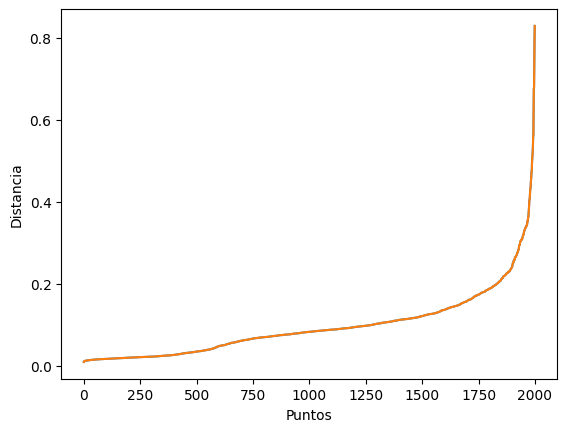

In [148]:
distancias = np.sort(distancias, axis=0)
distancias = distancias[:, 9]
plt.plot(distancias)
plt.plot(distancias)
plt.xlabel("Puntos")
plt.ylabel("Distancia")

* asi se saca el numeor epsilon del DBSCAN